In [2]:
!pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install

[I 11:25:36 InstallContribNbextensionsApp] jupyter contrib nbextension install 
[I 11:25:36 InstallContribNbextensionsApp] Installing jupyter_contrib_nbextensions nbextension files to jupyter data directory
[I 11:25:36 InstallContribNbextensionsApp] Installing C:\Users\aischool\anaconda3\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\addbefore -> addbefore
[I 11:25:36 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\addbefore\addbefore.yaml
[I 11:25:36 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\addbefore\icon.png
[I 11:25:36 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\addbefore\main.js
[I 11:25:36 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\addbefore\readme.md
[I 11:25:36 InstallContribNbextensionsApp] - Validating: ok
[I 11:25:36 InstallContribNbextensionsApp] Installing C:\Users\aischool\anaconda3\lib\site-packages\jupyter_contrib_nbexte

[I 11:25:36 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\code_prettify\README.md
[I 11:25:36 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\code_prettify\README_2to3.md
[I 11:25:36 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\code_prettify\README_autopep8.md
[I 11:25:36 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\code_prettify\README_code_prettify.md
[I 11:25:36 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\code_prettify\README_isort.md
[I 11:25:36 InstallContribNbextensionsApp] - Validating: ok
[I 11:25:36 InstallContribNbextensionsApp] Installing C:\Users\aischool\anaconda3\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\code_prettify -> code_prettify
[I 11:25:36 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\code_prettify\2to3.js
[I 11:25:36 InstallContribNbextensionsApp] Up

### 목표
- 머신러닝 기반 데이터 분석 프로세스를 이해하자. 
- 데이터 전처리, 탐색적 데이터 분석을 실습해보자. 
- 타이타닉 탐승객의 생존여부를 예측분석 해보자.

#### 데이터분석 프로세스
1. 문제정의
2. 데이터 수집
3. 데이터 전처리(preprocessing)
4. 탐색적 데이터분석(EDA)
5. 모델링(정의, 학습, 예측)
6. 모델평가
7. 모델활용 및 결과 리포팅

#### 1. 문제정의
- kaggle의 타이타닉 데이터를 분석해보자.(생존자 예측 분석)
- 지도학습 이용 -> 분류 -> 이진분류

#### 2. 데이터 수집
- kaggle에 업로드된 데이터 활용
- train.csv, test.csv 활용

In [3]:
# EDA를 위한 분석 라이브러리 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 검증 데이터 분리를 위한 함수
from sklearn.model_selection import train_test_split
# 학습을 위한 모델 클래스
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# 평가를 위한 함수(정확도)
from sklearn.metrics import accuracy_score

[I 11:25:36 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\latex_envs\doc\README.md
[I 11:25:36 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\latex_envs\doc\Toggles.png
[I 11:25:36 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\latex_envs\doc\.ipynb_checkpoints\latex_env_doc-checkpoint.ipynb
[I 11:25:36 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\latex_envs\doc\latex_env_doc_files\latex_env_doc_23_2.png
[I 11:25:36 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\latex_envs\doc\latex_env_doc_files\latex_env_doc_24_2.png
[I 11:25:36 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\latex_envs\doc\latex_env_doc_files\latex_env_doc_26_2.png
[I 11:25:36 InstallContribNbextensionsApp] Up to date: C:\ProgramData\jupyter\nbextensions\latex_envs\doc\latex_env_doc_files\latex_env_doc_27_2.png
[I 11:25:36 In

In [4]:
train = pd.read_csv("./data/titanic/train.csv", index_col="PassengerId")
test = pd.read_csv("./data/titanic/test.csv", index_col="PassengerId")
display("Train")
display(train.head())
display("Test")
display(test.head())

'Train'

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


'Test'

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### 3. 데이터 전처리 ~ 4. 탐색적데이터 분석(EDA)

#### 1. 전체데이터 수 파악

In [5]:
train.shape,test.shape

((891, 11), (418, 10))

##### 2. 결측치 파악(train,test)

In [6]:
#display(train.info())
#display(test.info())

train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

- train 결측치: Age, Cabin, Embarked
- test 결측치: Age, Cabin, Fare

##### 3. 결측치 채우기

In [8]:
# 기술통계 확인 
display(train[['Age','Cabin','Embarked']].describe(include='all'))
display(test[['Age','Cabin','Fare']].describe(include='all'))

,Age,Cabin,Embarked
count,714.000000,204,889
unique,NaN,147,3
top,NaN,B96 B98,S
freq,NaN,4,644
mean,29.699118,NaN,NaN
std,14.526497,NaN,NaN
min,0.420000,NaN,NaN
25%,20.125000,NaN,NaN
50%,28.000000,NaN,NaN
75%,38.000000,NaN,NaN


,Age,Cabin,Fare
count,332.000000,91,417.000000
unique,NaN,76,NaN
top,NaN,B57 B59 B63 B66,NaN
freq,NaN,3,NaN
mean,30.272590,NaN,35.627188
std,14.181209,NaN,55.907576
min,0.170000,NaN,0.000000
25%,21.000000,NaN,7.895800
50%,27.000000,NaN,14.454200
75%,39.000000,NaN,31.500000


In [9]:
# Fare 채우기(수치 데이터 -평균, 중앙값 등 )
test['Fare'].describe()
test['Fare'].fillna(14,inplace=True)

# Embarked 채우기 (범주형 데이터 - 최빈값 등)
train['Embarked'].describe()
train['Embarked'].fillna('S',inplace=True)

In [10]:
# 채운 결측치 확인
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [11]:
# 채운 결측치 확인
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
dtype: int64

In [12]:
# Age 채우기 - 상관관계 및 데이터 그룹핑을 이용
display(train.corr()) # 전체 상관계수 확인
display(train.corr()['Age']) # Age의 상관계수 확인

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Survived   -0.077221
Pclass     -0.369226
Age         1.000000
SibSp      -0.308247
Parch      -0.189119
Fare        0.096067
Name: Age, dtype: float64

- Pclass가 Age와 반비례 관계를 가진다(상관계수 : -0.36) Pclass     -0.369226
- 등급숫자가 높아질수록 나이대가 어려진다. 
- 그리고 시대적 배경을 고려해 남성과 여성도 활용하자.

In [13]:
# 등급과 성별을 모두 이용해 그룹핑을 하고 나이의 중앙값을 계산시켜보자
# 나이의 중앙 값을 계산시켜보자
train[['Age','Pclass','Sex']].groupby(by=['Pclass','Sex']).median()

Age
Pclass Sex         
1      female  35.0
       male    40.0
2      female  28.0
       male    30.0
3      female  21.5
       male    25.0

In [14]:
# 데이터 채우기 
age_data=train[['Age','Pclass','Sex']].groupby(by=['Pclass','Sex']).transform('median')

In [15]:
train['Age'].fillna(age_data['Age'],inplace=True)

In [16]:
train['Age'].isnull().sum()

0

In [17]:
# test age 채우기
test[['Age','Pclass','Sex']].groupby(by=['Pclass','Sex']).median()

# 데이터 채우기 
age_data_test=test[['Age','Pclass','Sex']].groupby(by=['Pclass','Sex']).transform('median')
test['Age'].fillna(age_data_test['Age'],inplace=True)


In [18]:
test['Age'].isnull().sum()

0

In [19]:
# Cabin 채우기
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

- 결측치 비율이 너무 높기 때문에 대체값을 추정하는 것보다는 결측치로 인정하는 값을 넣자. 
- 고유값이 너무 많아서 앞글자만 따서 정리하자

In [20]:
train['Cabin']=train['Cabin'].str[0]

In [21]:
train['Cabin'].fillna('M', inplace=True) #M은 missig
train['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [22]:
# test cabin 채우기 

In [23]:
test['Cabin']=test['Cabin'].str[0]
test['Cabin'].fillna('M', inplace=True) #M은 missig
test['Cabin'].unique()

array(['M', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

- train에는 T가 있는데 test에는 없다.

In [24]:
# -------------------------여기까지가 결측치 처리다.----------------------------------------

#### 범주형 데이터 시각화
- 빈도기반의 시각화 방법 활용: bar차트, pie 차트

##### 4. 성별에 따른 생존여부 시각화

<AxesSubplot:xlabel='Sex', ylabel='count'>

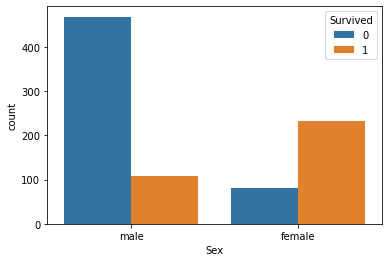

In [25]:
sns.countplot(data=train, x="Sex", hue='Survived')

##### 5.등급에 따른 생존여부 시각화

<AxesSubplot:xlabel='Pclass', ylabel='count'>

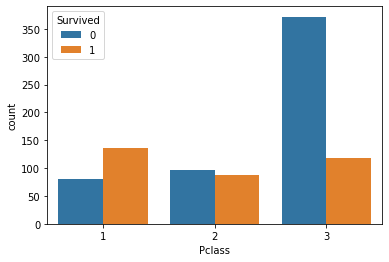

In [26]:
sns.countplot(data=train, x="Pclass", hue='Survived')

In [27]:
# ----------------------------------------0920▽--------------------------------------

##### 6. 탑승지에 따른 생존여부 시각화

<AxesSubplot:xlabel='Embarked', ylabel='count'>

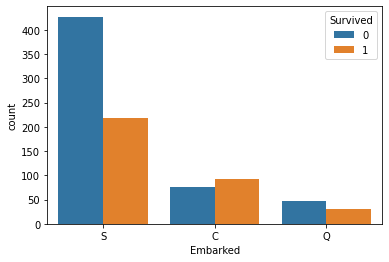

In [28]:
sns.countplot(data=train, x="Embarked", hue="Survived")

##### 7. Cabin에 따른 생존여부 시각화


<AxesSubplot:xlabel='Cabin', ylabel='count'>

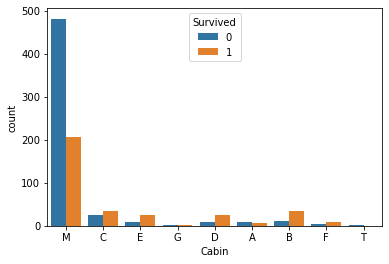

In [29]:
sns.countplot(data=train, x="Cabin", hue="Survived")

##### 8. 등급과 성별을 묶어서 시각화

In [30]:
train['Dead'] = 1 - train['Survived']

<AxesSubplot:xlabel='Pclass,Sex'>

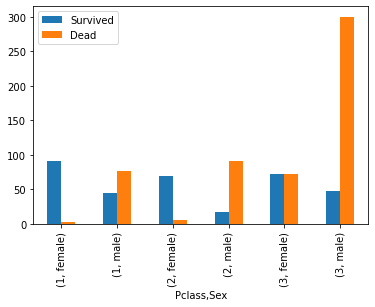

In [31]:
train[['Sex','Pclass','Survived','Dead']].groupby(by=['Pclass','Sex']).sum().plot(kind='bar')

##### 9. Cabin 과 Pclass를 묶어서 시각화

<AxesSubplot:xlabel='Cabin', ylabel='count'>

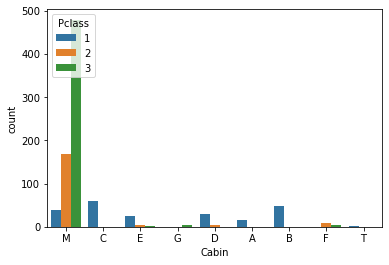

In [32]:
sns.countplot(data=train, x="Cabin", hue="Pclass")

#### 수치형 데이터 시각화
- 시계열 데이터 : line 그래프
- 두 수치데이터 사이의 관계 확인 : scatter 그래프(산점도)
- 수치 데이터를 구간화해서 분포를 보는 경우 : 히스토그램, KDE (커널밀도 추정)
- 사분위수를 이용해서 데이터 분포를 보는 경우 : box plot

#### 10. Age히스토그램

<AxesSubplot:ylabel='Frequency'>

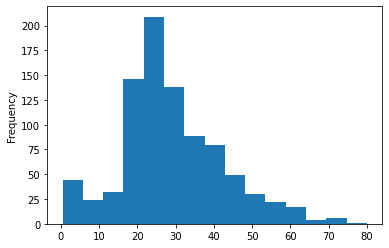

In [33]:
train['Age'].plot(kind='hist', bins=15)    # hist=history, bins=15개 구간으로 나눈다.

#### 11. Age 커널밀도추정 그래프

<AxesSubplot:xlabel='Age', ylabel='Density'>

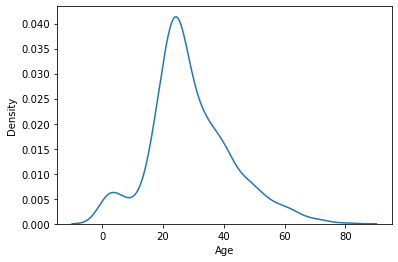

In [34]:
sns.kdeplot(train['Age'])  # 정규분포를 이용함. 밀집도를 추정해서 보여준다.

#### 12. Fare boxplot

<AxesSubplot:>

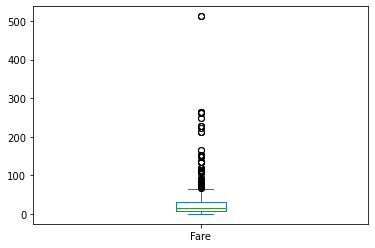

In [35]:
train['Fare'].plot(kind='box')

#### 13. Age 와 Survived, Sex를 결합한 시각화
- violin plot

<AxesSubplot:xlabel='Sex', ylabel='Age'>

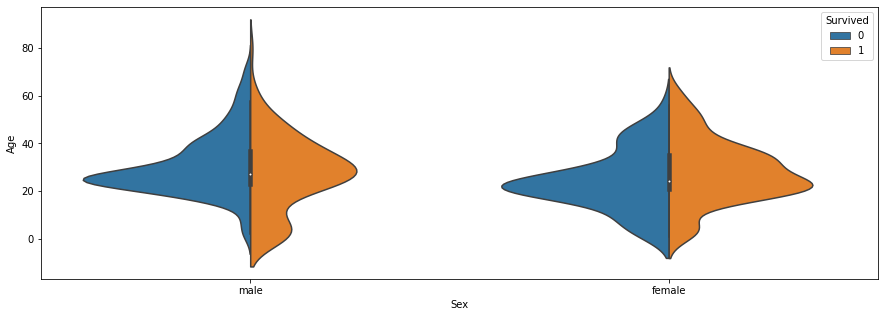

In [36]:
plt.figure(figsize=(15,5)) # 그림 크기 설정
sns.violinplot(data=train, # 사용할 데이터
               x='Sex', # x축 컬럼
               y='Age', # y축 컬럼(KDE)
               hue='Survived', # 데이터를 분리할 컬럼
               split=True) # 분리된거를 절반으로 쪼개서 병합

- 나이가 10살 미만인 친구들 중에는 남자아이가 살 확률이 높다. 
- 성별과 나이가 함께 학습되면 도움이 될 수 있다. 

#### 특성공학

##### 14. 파생변수(새로운 feature) 생성
- Parch, SibSp를 합쳐서 가족이라는 컬럼을 만들자.

<AxesSubplot:xlabel='Parch', ylabel='count'>

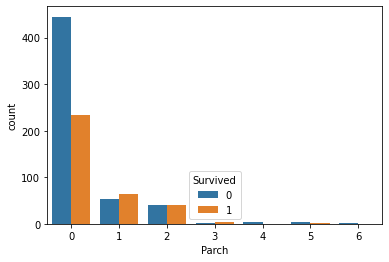

In [37]:
# parch 시각화
sns.countplot(data=train, x='Parch', hue='Survived')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

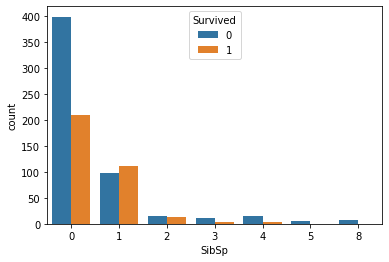

In [38]:
# SibSp시각화
sns.countplot(data=train, x='SibSp', hue='Survived')

In [39]:
train['Family'] = train['Parch']+train['SibSp']

<AxesSubplot:xlabel='Family', ylabel='count'>

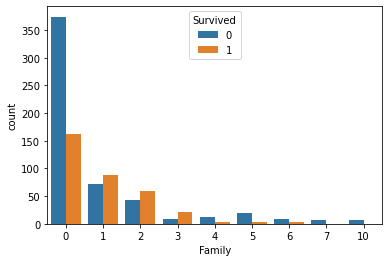

In [40]:
# Family
sns.countplot(data=train, x='Family', hue='Survived')

- 혼자 탑승한 사람은 죽은 사람의 비율 높다. 
- 1~3명의 가족이 있으면 산 사람의 비율이 살짝 높다. 
- 4명이상의 가족이 있으면 죽은 사람의 비율이 살짝 높다. 
- binning(구간화) 작업을 통해 Family컬럼을 범주형으로 변경해보자.

##### 15. binning(수치형 -> 범주형)
- Family 컬럼을 Family_cut 컬럼으로 만들어보자.
- 범주의 종류(Alone, Small, Large)

In [41]:
bins= [-1,0,3,20]
cat= ["Alone","Small","Large"]

In [42]:
Family_cut=pd.cut(train['Family'], bins=bins, labels=cat)
Family_cut

PassengerId
1      Small
2      Small
3      Alone
4      Small
5      Alone
       ...  
887    Alone
888    Alone
889    Small
890    Alone
891    Alone
Name: Family, Length: 891, dtype: category
Categories (3, object): ['Alone' < 'Small' < 'Large']

In [43]:
train["Family_cut"] = Family_cut

In [44]:
# test 데이터 적용
test['Family'] = test['Parch'] + test['SibSp']
Family_cut_test=pd.cut(test['Family'], bins=bins, labels=cat)
test['Family_cut'] =Family_cut_test

##### 16. Name 컬럼 다루기
- 이름 중간에 호칭을 추출해 Title이라는 컬럼을 만들어보자.

In [45]:
train['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [46]:
#Title=train['Name'].str.split(".", expand=True)
#Title =Title[0].str.split(",", expand=True)
#Title = Title[1]
#train[Title] =Title

train['Title']=train['Name'].str.split(",").str[1].str.split(".").str[0].str.strip()

In [47]:
# test 데이터 적용
test['Title']=test['Name'].str.split(",").str[1].str.split(".").str[0].str.strip()

In [48]:
# 호칭 종류 정리하기
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [49]:
# Mr, Miss, Mrs, Master, Other 으로 통합하자
title_vc = train['Title'].value_counts()
title_vc

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [50]:
(['Other']*(len(title_vc.index)-4))

['Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other']

In [51]:
# map 함수 이용
title_dict = dict(zip(title_vc.index,['Mr','Miss','Mrs','Master']+(['Other']*(len(title_vc.index)-4))))

In [52]:
train['Title']=train['Title'].map(title_dict)
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [53]:
# test에 적용
title_vc_test = test['Title'].value_counts()
title_dict_test = dict(zip(title_vc_test.index,['Mr','Miss','Mrs','Master']+(['Other']*(len(title_vc_test.index)-4))))
test['Title']=test['Title'].map(title_dict_test)
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

##### 17. 인코딩(글자타입->숫자타입)처리

In [54]:
# 컬럼이름 정리
train.columns 

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Dead', 'Family', 'Family_cut', 'Title'],
      dtype='object')

In [55]:
feature_names = ['Sex','Cabin','Embarked','Family_cut','Title']

In [56]:
train_one_hot = pd.get_dummies(train[feature_names])
train_one_hot

,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,...,Embarked_Q,Embarked_S,Family_cut_Alone,Family_cut_Small,Family_cut_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,1,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5,0,1,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,1,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1
888,1,0,0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
889,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,1,0,0,0


In [57]:
# test처리
test_one_hot = pd.get_dummies(test[feature_names])
test_one_hot

,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,...,Embarked_Q,Embarked_S,Family_cut_Alone,Family_cut_Small,Family_cut_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
893,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
894,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
895,0,1,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,1,0,0
896,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0,1,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,1,0,0
1306,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1307,0,1,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,1,0,0


In [58]:
train = pd.concat([train, train_one_hot], axis=1)
test= pd.concat([test, test_one_hot], axis=1)

##### 18. 필요없는 컬럼 삭제 및 확인

In [59]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Dead', 'Family', 'Family_cut', 'Title',
       'Sex_female', 'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_M', 'Cabin_T', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Family_cut_Alone', 'Family_cut_Small',
       'Family_cut_Large', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Other'],
      dtype='object')

In [60]:
train.drop(['Name','Ticket','Dead']+feature_names, axis=1, inplace=True)

In [61]:
test.drop(['Name','Ticket']+feature_names, axis=1, inplace=True)

In [62]:
train.shape, test.shape

((891, 29), (418, 27))

In [63]:
# 부족한 컬럼이 뭔지 확인
display("train에는 있지만 test에는 없는 컬럼")
display(set(train.columns) - set(test.columns))

display("test에는 있지만 train에는 없는 컬럼")
display(set(test.columns) - set(train.columns))

'train에는 있지만 test에는 없는 컬럼'

{'Cabin_T', 'Survived'}

'test에는 있지만 train에는 없는 컬럼'

set()

In [64]:
test['Cabin_T'] = 0

In [65]:
# 부족한 컬럼이 뭔지 확인
display("train에는 있지만 test에는 없는 컬럼")
display(set(train.columns) - set(test.columns))

display("test에는 있지만 train에는 없는 컬럼")
display(set(test.columns) - set(train.columns))

'train에는 있지만 test에는 없는 컬럼'

{'Survived'}

'test에는 있지만 train에는 없는 컬럼'

set()

In [66]:
# 새로 추가한 Cabin_T때문에 test의 컬럼순서가 1칸씩 밀림.
train.sort_index(axis=1, inplace=True)
test.sort_index(axis=1, inplace=True)

In [67]:
train.shape, test.shape

((891, 29), (418, 28))

### 5. 모델링(정의, 학습, 예측)

In [68]:
# 모델 정의
knn_model = KNeighborsClassifier()
tree_model = DecisionTreeClassifier()

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               891 non-null    float64
 1   Cabin_A           891 non-null    uint8  
 2   Cabin_B           891 non-null    uint8  
 3   Cabin_C           891 non-null    uint8  
 4   Cabin_D           891 non-null    uint8  
 5   Cabin_E           891 non-null    uint8  
 6   Cabin_F           891 non-null    uint8  
 7   Cabin_G           891 non-null    uint8  
 8   Cabin_M           891 non-null    uint8  
 9   Cabin_T           891 non-null    uint8  
 10  Embarked_C        891 non-null    uint8  
 11  Embarked_Q        891 non-null    uint8  
 12  Embarked_S        891 non-null    uint8  
 13  Family            891 non-null    int64  
 14  Family_cut_Alone  891 non-null    uint8  
 15  Family_cut_Large  891 non-null    uint8  
 16  Family_cut_Small  891 non-null    uint8  
 1

In [70]:
# 모델 학습
# 1. 문제와 정답 분리

X_train= train.drop('Survived',axis=1)
y_train= train['Survived']

# 2. 훈련데이터를 8:2로 분리해서 train2, val 셋으로 구성
# (randomstate = 921)

X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, random_state=921, test_size=0.2) 


In [71]:
# 3-1. KNN모델 최적화
train_score_list = [] # 훈련데이터 점수 리스트
val_score_list = [] # 검증 데이터 점수 리스트
for n in range(1,25) : # 이웃의 숫자를 1-24명 설정
    m = KNeighborsClassifier(n_neighbors=n)
    m.fit(X_train2, y_train2)
    # 훈련데이터 예측 및 평가
    pre_train = m.predict(X_train2)
    score_train = accuracy_score(y_train2, pre_train)
    train_score_list.append(score_train)
    # 검증데이터 예측 및 평가
    pre_val=m.predict(X_val)
    score_val=accuracy_score(y_val, pre_val)
    val_score_list.append(score_val)

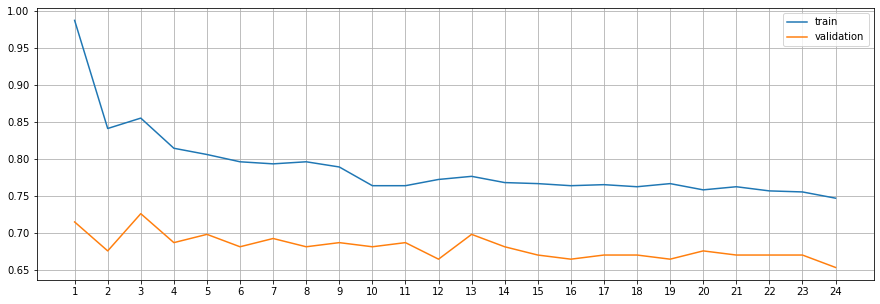

In [72]:
plt.figure(figsize=(15,5)) # 그림크기 설정 (가로,세로)
plt.plot(range(1,25),train_score_list, label='train') # 라인1
plt.plot(range(1,25),val_score_list, label='validation') # 라인2
plt.xticks(range(1,25)) # x축 눈금
plt.grid() # 배경 격자무늬
plt.legend() # 범례
plt.show() # 그림 보여주기

In [73]:
# 3-2. tree 모델 최적화
train_score_list = [] # 훈련데이터 점수 리스트
val_score_list = [] # 검증 데이터 점수 리스트
for d in range(1,31) : # 최대 깊이를 1-30 설정
    m = DecisionTreeClassifier(max_depth=d)
    m.fit(X_train2, y_train2)
    # 훈련데이터 예측 및 평가
    pre_train = m.predict(X_train2)
    score_train = accuracy_score(y_train2, pre_train)
    train_score_list.append(score_train)
    # 검증데이터 예측 및 평가
    pre_val=m.predict(X_val)
    score_val=accuracy_score(y_val, pre_val)
    val_score_list.append(score_val)

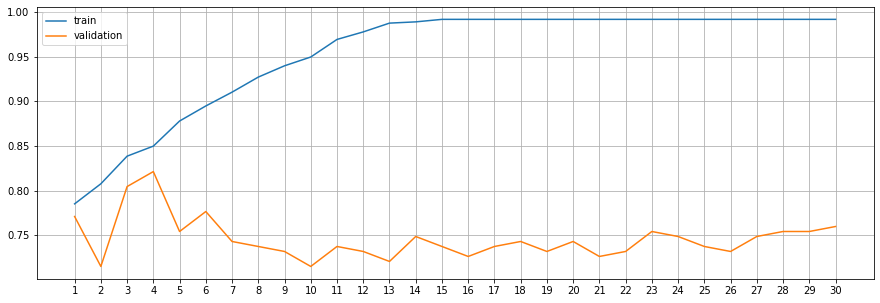

In [74]:
plt.figure(figsize=(15,5)) # 그림크기 설정 (가로,세로)
plt.plot(range(1,31),train_score_list, label='train') # 라인1
plt.plot(range(1,31),val_score_list, label='validation') # 라인2
plt.xticks(range(1,31)) # x축 눈금
plt.grid() # 배경 격자무늬
plt.legend() # 범례
plt.show() # 그림 보여주기

In [75]:
# 3-3. 최종 학습
final_knn_model = KNeighborsClassifier(n_neighbors=3)
final_knn_model.fit(X_train2,y_train2)

KNeighborsClassifier(n_neighbors=3)

In [76]:
# 3-3-1 최종학습
final_tree_model = DecisionTreeClassifier(max_depth=4)
final_tree_model.fit(X_train2,y_train2)

DecisionTreeClassifier(max_depth=4)

#### 6. 모델평가

In [77]:
# kaggle 업로드해서 평가
# 28개의 feature를 가진 test데이터를 활용
knn_pre = final_knn_model.predict(test)
tree_pre = final_tree_model.predict(test)

In [78]:
# 정답지 로딩
submission = pd.read_csv("./data/titanic/gender_submission.csv")

In [79]:
# KNN 예측 값 파일로 저장
submission['Survived']=knn_pre
submission.to_csv("./data/titanic/knn_pre1.csv", index=False)

In [80]:
# DecisionTree 예측 값 파일로 저장
submission['Survived']=tree_pre
submission.to_csv("./data/titanic/tree_pre1.csv", index=False)

#####  데이터 스케일링
- KNN의 경우 데이터 스케일에 영향을 많이 받는 모델이다.
- 특히 Fare가 이상치도 존재하고 다른 특성에 비해 거리 값을 조정하는데 많은 영향을 준다.
- Fare를 데이터 스케일링해서 성능개선 여부를 확인해보자.

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

<AxesSubplot:xlabel='Fare', ylabel='Density'>

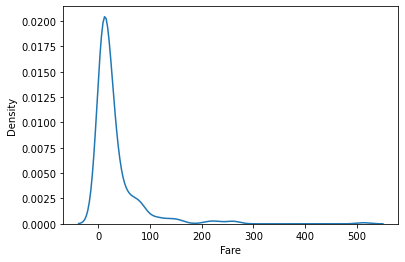

In [82]:
# 원래 요금의 분포(KDE)
sns.kdeplot(train['Fare'])

In [83]:
# 스케일링
scaler =RobustScaler() # 스케일러 객체 생성
scaler.fit(train[['Fare']]) # 기준값 계산(4분위 수)
transformed_fare = scaler.transform(train[['Fare']]) # 변환

<AxesSubplot:ylabel='Density'>

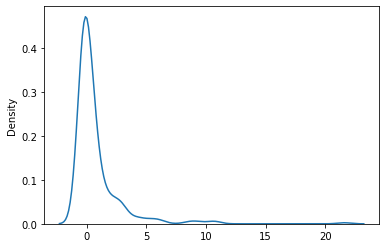

In [84]:
# 스케일링된 요금의 분포(KDE)
sns.kdeplot(transformed_fare.reshape(-1))

In [85]:
# KNN 재학습
X_train['Fare'] = transformed_fare # 스케일링된 데이터로 교체

# 훈련셋, 검증셋 분리
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, random_state=921, test_size=0.2) 

# 모델 정의 및 학습
final_knn_model2=KNeighborsClassifier(n_neighbors=3)
final_knn_model2.fit(X_train2,y_train2)


# test 스케일링
test['Fare'] = scaler.transform(test[['Fare']])

# 스케일링된 test 데이터로 예측
knn_pre2 = final_knn_model2.predict(test)

In [86]:
# KNN 예측 값 파일로 저장
submission['Survived']=knn_pre2
submission.to_csv("./data/titanic/knn_pre2.csv", index=False)

#### 전처리된 파일 저장(csv)

In [87]:
X_train.to_csv("./data/titanic/preprocessing_X_train.csv")
test.to_csv("./data/titanic/preprocessing_test.csv")
y_train.to_csv("./data/titanic/y_train.csv")